In [23]:
# Demonstrate Gradient descent and the back propagation algorithm
# Solving using 2 ways basic function and with framework



import numpy as np
import matplotlib.pyplot as plt


In [24]:
# Generate synthetic data
np.random.seed(42)
X = np.random.rand(2, 100)  # Two features, 100 data points
Y = np.random.randint(0, 2, (1, 100))  # Binary target


In [25]:
# Hyperparameters
input_size = X.shape[0]
hidden_size = 4
output_size = 1
learning_rate = 0.01
epochs = 1000



In [26]:
# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)


In [27]:
# Initialize parameters
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(42)
    W_hidden = np.random.rand(hidden_size, input_size)
    b_hidden = np.zeros((hidden_size, 1))
    W_output = np.random.rand(output_size, hidden_size)
    b_output = np.zeros((output_size, 1))

    return W_hidden, b_hidden, W_output, b_output



In [28]:
# Forward propagation
def forward_propagation(X, W_hidden, b_hidden, W_output, b_output):
    Z_hidden = np.dot(W_hidden, X) + b_hidden
    A_hidden = sigmoid(Z_hidden)
    Z_output = np.dot(W_output, A_hidden) + b_output
    A_output = sigmoid(Z_output)

    return Z_hidden, A_hidden, Z_output, A_output



In [29]:
# Compute loss
def compute_loss(A_output, Y):
    m = Y.shape[1]
    loss = - (1 / m) * np.sum(Y * np.log(A_output) + (1 - Y) * np.log(1 - A_output))
    return loss



In [30]:
# Backward propagation
def backward_propagation(X, Y, Z_hidden, A_hidden, Z_output, A_output, W_output):
    m = Y.shape[1]

    dZ_output = A_output - Y
    dW_output = (1 / m) * np.dot(dZ_output, A_hidden.T)
    db_output = (1 / m) * np.sum(dZ_output, axis=1, keepdims=True)

    dZ_hidden = np.dot(W_output.T, dZ_output) * sigmoid_derivative(A_hidden)
    dW_hidden = (1 / m) * np.dot(dZ_hidden, X.T)
    db_hidden = (1 / m) * np.sum(dZ_hidden, axis=1, keepdims=True)

    return dW_hidden, db_hidden, dW_output, db_output



In [31]:
# Update parameters
def update_parameters(W_hidden, b_hidden, W_output, b_output, dW_hidden, db_hidden, dW_output, db_output, learning_rate):
    W_hidden -= learning_rate * dW_hidden
    b_hidden -= learning_rate * db_hidden
    W_output -= learning_rate * dW_output
    b_output -= learning_rate * db_output

    return W_hidden, b_hidden, W_output, b_output



In [32]:
# Train the neural network
def train_neural_network(X, Y, hidden_size, output_size, learning_rate, epochs):
    input_size = X.shape[0]
    W_hidden, b_hidden, W_output, b_output = initialize_parameters(input_size, hidden_size, output_size)

    for epoch in range(epochs):
        # Forward propagation
        Z_hidden, A_hidden, Z_output, A_output = forward_propagation(X, W_hidden, b_hidden, W_output, b_output)

        # Compute loss
        loss = compute_loss(A_output, Y)

        # Backward propagation
        dW_hidden, db_hidden, dW_output, db_output = backward_propagation(X, Y, Z_hidden, A_hidden, Z_output, A_output, W_output)

        # Update parameters
        W_hidden, b_hidden, W_output, b_output = update_parameters(W_hidden, b_hidden, W_output, b_output, dW_hidden, db_hidden, dW_output, db_output, learning_rate)

        # Print the loss every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return W_hidden, b_hidden, W_output, b_output



In [33]:
# Train the neural network
trained_parameters = train_neural_network(X, Y, hidden_size, output_size, learning_rate, epochs)

# Test the trained network with new data
def predict(X, W_hidden, b_hidden, W_output, b_output):
    _, _, _, A_output = forward_propagation(X, W_hidden, b_hidden, W_output, b_output)
    predictions = (A_output > 0.5).astype(int)
    return predictions



Epoch 0, Loss: 0.8736023253758296
Epoch 100, Loss: 0.7532757451668407
Epoch 200, Loss: 0.7112029721695292
Epoch 300, Loss: 0.6980654752546296
Epoch 400, Loss: 0.6941216965070645
Epoch 500, Loss: 0.6929334771355903
Epoch 600, Loss: 0.6925538592701413
Epoch 700, Loss: 0.692409845257748
Epoch 800, Loss: 0.6923345111683213
Epoch 900, Loss: 0.6922794249507496


In [34]:
# Generate new test data
X_test = np.random.rand(2, 10)
predictions = predict(X_test, *trained_parameters)

# Display the results
print("\nPredictions:")
print(predictions)



Predictions:
[[1 1 1 1 1 1 1 1 1 1]]


In [35]:
# using tensorflow framework

import tensorflow as tf
import numpy as np


In [36]:

# Generate synthetic data
np.random.seed(42)
X = np.random.rand(100, 2)  # Two features, 100 data points
Y = np.random.randint(0, 2, (100, 1))  # Binary target



In [37]:
# Hyperparameters
input_size = 2
hidden_size = 4
output_size = 1
learning_rate = 0.01
epochs = 1000



In [38]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_size, activation='sigmoid', input_shape=(input_size,), name='hidden_layer'),
    tf.keras.layers.Dense(output_size, activation='sigmoid', name='output_layer')
])



In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_layer (Dense)        (None, 4)                 12        
                                                                 
 output_layer (Dense)        (None, 1)                 5         
                                                                 
Total params: 17 (68.00 Byte)
Trainable params: 17 (68.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])



In [46]:
# Train the model
history = model.fit(X, Y, epochs=epochs,verbose=0)


In [47]:
# Evaluate the model
loss, accuracy = model.evaluate(X, Y)
print(f'\nFinal Loss: {loss}, Final Accuracy: {accuracy}')

4/4 [==============================] - 0s 4ms/step - loss: 0.6866 - accuracy: 0.5500

Final Loss: 0.6865506172180176, Final Accuracy: 0.550000011920929


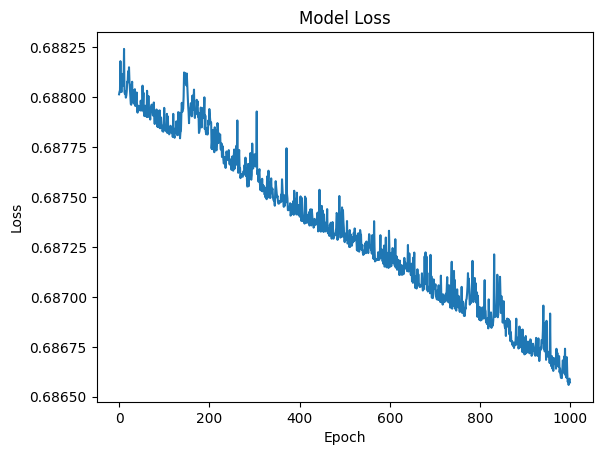

In [48]:
# Plot the loss over epochs
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


In [49]:
# Test the trained model with new data
X_test = np.random.rand(10, 2)
predictions = model.predict(X_test)
binary_predictions = (predictions > 0.5).astype(int)

# Display the results
print("\nPredictions:")
print(binary_predictions)


1/1 [==============================] - 0s 25ms/step

Predictions:
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]
